In [1]:
import pandas as pd
import numpy as np
import pandas
import xlrd
import openpyxl
import os
import pickle, joblib

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
np.random.seed(41)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_pre= pd.read_csv('cleaned_loan.csv')

df = df_pre[['loan_amnt','int_rate','emp_length','annual_inc','loan_status','home_ownership','purpose','term']]
df.iloc[:,[1,3]]=df.iloc[:,[1,3]].astype(int)
df.head()


C:\Users\mailr\anaconda3\envs\PythonAdv\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,loan_amnt,int_rate,emp_length,annual_inc,loan_status,home_ownership,purpose,term
0,30000,22,5,100000,1,1,2,0
1,40000,16,0,45000,1,1,1,1
2,20000,7,10,100000,1,1,1,0
3,4500,11,10,38500,1,3,1,0
4,8425,27,3,450000,1,1,1,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47007 entries, 0 to 47006
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   loan_amnt       47007 non-null  int64
 1   int_rate        47007 non-null  int32
 2   emp_length      47007 non-null  int64
 3   annual_inc      47007 non-null  int32
 4   loan_status     47007 non-null  int64
 5   home_ownership  47007 non-null  int64
 6   purpose         47007 non-null  int64
 7   term            47007 non-null  int64
dtypes: int32(2), int64(6)
memory usage: 2.5 MB


In [6]:
df.purpose.value_counts()

2     23894
1      9382
8      4559
3      3812
5      1524
6       904
4       860
0       677
10      489
11      451
7       423
9        30
12        2
Name: purpose, dtype: int64

In [7]:
df.describe()


,loan_amnt,int_rate,emp_length,annual_inc,loan_status,home_ownership,purpose,term
count,47007.000000,47007.000000,47007.000000,4.700700e+04,47007.000000,47007.000000,47007.000000,47007.000000
mean,14935.434084,12.955879,6.305572,8.001621e+04,0.852916,1.848278,2.864850,0.271130
std,10164.850522,5.513847,3.723621,7.756004e+04,0.354194,0.918241,2.336235,0.444548
min,1000.000000,5.000000,0.000000,3.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,7000.000000,9.000000,3.000000,4.750000e+04,1.000000,1.000000,2.000000,0.000000
50%,12000.000000,12.000000,7.000000,6.700000e+04,1.000000,1.000000,2.000000,0.000000
75%,20000.000000,16.000000,10.000000,9.500000e+04,1.000000,3.000000,3.000000,1.000000
max,40000.000000,30.000000,10.000000,9.300000e+06,1.000000,3.000000,12.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split
y = df[["loan_status"]]
X = df.drop(columns=["loan_status"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
y.value_counts()

loan_status
1              40093
0               6914
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit and transform it to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_train)


In [13]:
X_train_scaled


array([[-0.38931987, -0.35289856, -0.34728666, ...,  1.2529416 ,
        -0.36915831, -0.61158346],
       [-0.29107222, -0.71573816,  0.99654289, ...,  0.1641005 ,
         0.06011738, -0.61158346],
       [ 1.67388061,  1.09845983, -1.69111621, ...,  1.2529416 ,
         0.91866877,  1.63509982],
       ...,
       [ 1.67388061,  0.00994104,  0.99654289, ..., -0.92474059,
        -0.36915831,  1.63509982],
       [-0.97880572, -0.89715795, -0.88481848, ...,  1.2529416 ,
         2.20649585, -0.61158346],
       [-1.27354864, -0.71573816,  0.19024516, ...,  1.2529416 ,
         1.77722016, -0.61158346]])

In [11]:
# saving scaler to current directory
pickle.dump(scaler, open('scaler.pkl','wb'))

In [18]:
#basic model, set only parameters: random_state=41 and class_weight
rfc=RandomForestClassifier(random_state=41)
rfc=rfc.fit(X_train, y_train.values.ravel())
score_rfc=rfc.score(X_test,y_test)
print("ramdom Forest score:{}".format(score_rfc))

ramdom Forest score:0.8413812663972204


0.8529155272531421


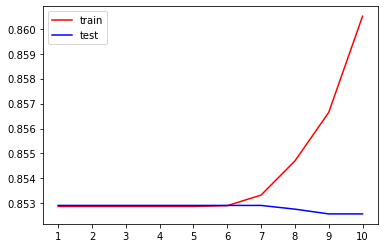

In [37]:
tr = []
te = []
for i in range(10):
    clf = RandomForestClassifier(random_state=41
                                 ,max_depth=i+1
                                 ,criterion="gini"
                               )
    clf = clf.fit(X_train_scaled, y_train.values.ravel())
    score_tr = clf.score(X_train_scaled, y_train.values.ravel())
    score_te = cross_val_score(clf,X,y.values.ravel(),cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [38]:
# import GridSerachCV to search for the best parameters combination
# test1
from sklearn.model_selection import GridSearchCV
params1 = {'n_estimators': [50,100,500],'max_depth':[4,5,6,7],'max_leaf_nodes':[2,4,5,20], "min_samples_leaf":[1,2,4,20],'random_state':[41], "n_jobs":[-1]}
grid = GridSearchCV(RandomForestClassifier(),params1,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train.values.ravel())
print(grid.best_params_)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'max_depth': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 41}


In [39]:
#after tuning parameters
best_model1 = RandomForestClassifier(**grid.best_params_)
best_model1.fit(X_train_scaled, y_train.values.ravel())
score_best_model1 = best_model1.score(X_test_scaled,y_test.values.ravel())
print("ramdom scaled Forest score:{}".format(score_best_model1))

ramdom scaled Forest score:0.853009997872793


In [40]:
# import GridSerachCV to search for the best parameters combination
# test2
from sklearn.model_selection import GridSearchCV
params2 = {'class_weight':[{0:0.6,1:0.4}],'criterion':('entropy','gini'),'max_depth':[4],'max_leaf_nodes':[2,10,15,30], "min_samples_leaf":[1,2,3,4],'random_state':[41], "n_jobs":[-1]}
grid = GridSearchCV(RandomForestClassifier(),params2,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train.values.ravel())
print(grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'class_weight': {0: 0.6, 1: 0.4}, 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'n_jobs': -1, 'random_state': 41}


In [41]:
#after tuning parameters set 2
best_model2 = RandomForestClassifier(**grid.best_params_)
best_model2.fit(X_train_scaled, y_train.values.ravel())
score_best_model2 = best_model2.score(X_test_scaled,y_test.values.ravel())
print("ramdom scaled Forest score:{}".format(score_best_model2))

ramdom scaled Forest score:0.853009997872793


In [19]:
# saving model to current directory
pickle.dump(rfc, open('RFCmodel.pkl','wb'))
